In [ ]:
# Этот блок кода удалит текущую версию TensorFlow (TF) и установит нужную.
# Его необходимо выполнять каждый раз, в самом начале подключчения к удалённой машине.
# В качестве решения задачи подойдёт только модель нейронной сети скомпилированная, обученная и сохранённая в версии TF 2.0.1
!pip uninstall tensorflow
# !pip uninstall gast
# !pip install gast==0.2.2
!pip install tensorflow==2.9.2
# после запуска кода, нужно будет ввести латинский "y" в поле под блоком кода и нажать энтер
# поле ввода откроется если щёлкнуть мышкой после появившегося ниже вопроса.
# установка займёт какое-то время

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.12.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.9.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

!ls /content/drive/MyDrive/olimp/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
annotations.csv  fourEx  images


In [ ]:

# импортируем необходимые для работы библиотеки и функции

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import random

import pickle
import cv2
import os

#библиотека, используемая для построения графиков обучения нейронной сети
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
def show_results(model_history):
    acc = model_history.history["accuracy"]
    val_acc = model_history.history['val_accuracy']
    plt.figure(figsize=(16, 8))
    plt.plot(np.arange(1, len(acc) + 1), acc, label='Training Accuracy')
    plt.plot(np.arange(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training Accuracy')
    plt.show()

In [ ]:
import pandas as pd

csv_path = '/content/drive/MyDrive/olimp/annotations.csv' # укажите путь к файлу с аннотациями
image_path = "/content/drive/MyDrive/olimp/" # укажите путь к папке с изображениями для тренировки

table = pd.read_csv(csv_path, delimiter=',')

row_num = len(table.axes[0])  # число строк (первая строка с заголовками столбцов не учитывается)
col_num = len(table.axes[1])  # учитываются только столбцы оригинальной таблицы

table

,image,class
0,images/p7FhNESI-2TX5-aXiT-9nNv-f7LJlzc9BgqO.jpg,artificial_roughness
1,images/XJV2G0zl-scMm-HsbL-ovdy-J4mvzVQBO5uF.jpg,artificial_roughness
2,images/Yp1H0brV-VXZB-SZTa-PcFZ-Nes25RWxLgM4.jpg,artificial_roughness
3,images/VhuQ8Uqi-XxbK-TJwS-j5RN-ApJqVTBg0lbZ.jpg,artificial_roughness
4,images/LudjvYTM-V03e-BeaZ-6Sfj-bpeRzYmtG8Ew.jpg,artificial_roughness
...,...,...
2009,images/SLgO1CMt-Lc5W-ODdj-nmiT-6wcTdxfeX1W3.jpg,stop
2010,images/OTHlqo7y-rDhB-vA14-DSyi-dCatrEmouHnV.jpg,stop
2011,images/rPoGD917-lij9-U5DX-wdnC-8JzLlqWnP6mv.jpg,stop
2012,images/zVivJRDq-NAzS-OEsy-jZHq-4eoMwm7K6Njf.jpg,stop


In [ ]:
table = table[(table['image'] != 'images/Ru25lpCY-Eijn-4Gc8-kboZ-xAgKWUIYsvwE.jpg')]
table

,image,class
0,images/p7FhNESI-2TX5-aXiT-9nNv-f7LJlzc9BgqO.jpg,artificial_roughness
1,images/XJV2G0zl-scMm-HsbL-ovdy-J4mvzVQBO5uF.jpg,artificial_roughness
2,images/Yp1H0brV-VXZB-SZTa-PcFZ-Nes25RWxLgM4.jpg,artificial_roughness
3,images/VhuQ8Uqi-XxbK-TJwS-j5RN-ApJqVTBg0lbZ.jpg,artificial_roughness
4,images/LudjvYTM-V03e-BeaZ-6Sfj-bpeRzYmtG8Ew.jpg,artificial_roughness
...,...,...
2009,images/SLgO1CMt-Lc5W-ODdj-nmiT-6wcTdxfeX1W3.jpg,stop
2010,images/OTHlqo7y-rDhB-vA14-DSyi-dCatrEmouHnV.jpg,stop
2011,images/rPoGD917-lij9-U5DX-wdnC-8JzLlqWnP6mv.jpg,stop
2012,images/zVivJRDq-NAzS-OEsy-jZHq-4eoMwm7K6Njf.jpg,stop


In [ ]:
data = []
labels = []

classes = [
    'artificial_roughness',
    'give_way',
    'movement_prohibition',
    'no_entry',
    'parking',
    'pedestrian_crossing',
    'road_works',
    'stop'
]

In [ ]:
for row in table.itertuples(): # перебираем строки
  # к элементу строки можно обращаться по индексу
  # индекс 0 - соответствует номеру строки, автоматическми добавляемому pandas
  image_type = row[2] # тип изображения записан во третьем столбце
#   if image_type == "alpha" or image_type == "beta": # какие изображения мы хотим выбрать?
  image = cv2.imread(image_path + row[1]) #  читаем файл с именем, записанным во втором столбце
  image = cv2.resize(image, (32, 32))
  data.append(image)
  label = [0, 0, 0, 0, 0, 0, 0, 0] # 16, по числу классов
  label[classes.index(image_type)] = 1
  labels.append(label)

    # небольшой счётчик, чтобы был ясен прогресс выполнения этого блока кода
  if row[0] % 100 == 0:
    print(str(row[0]) + " из " + str(row_num))

data = np.array(data, dtype="float") / 255 # создаём из списка массив и нормируем изображения на 1
labels = np.array(labels) # создаём из списка массив numpy

# сохраняем массив c изображениями
with open("/content/data_all_char.pickle", 'wb') as f:
  pickle.dump(data, f)
print("Data seved")

# сохраняем список с лэйблами - метками
with open("/content/labels_all_char.pickle", 'wb') as f:
  pickle.dump(labels, f)
print("Labels seved")

# Если вы один раз выполнили этот блок кода, у вас появятся файлы ".picle"
# В них сохранены массивы с изображениями и соответствующими метками.
# Когда вы будете работать с датасетом в следующий раз,
# не придётся снова работать csv файлом, читать изоражения с диска и формировать для них метки.
# Достаточно загрузить данные из файлов ".picle", в следующем блоке кода.


0 из 2014
100 из 2014
200 из 2014
300 из 2014
400 из 2014
500 из 2014
600 из 2014
700 из 2014
800 из 2014
900 из 2014
1000 из 2014
1100 из 2014
1200 из 2014
1300 из 2014
1400 из 2014
1500 из 2014
1600 из 2014
1700 из 2014
1800 из 2014
1900 из 2014
2000 из 2014
Data seved
Labels seved


In [ ]:
# загружаем массив с изображениями с диска
with open("/content/data_all_char.pickle", 'rb') as f:
  X = pickle.load(f)
print("Data loaded")

# загружаем список с лейблами-метками
with open("/content/labels_all_char.pickle", 'rb') as f:
  Y = pickle.load(f)
print("Labels loaded")

# делим подготовленные данные на тренировочную и валидационную часть
(trainX, testX, trainY, testY) = train_test_split(X, Y,
                                                  test_size=0.15,  # доля изображений для проверки
                                                  random_state=42)

print("Dataset prepared")

Data loaded
Labels loaded
Dataset prepared


In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation
# from tensorflow.keras.layers import Dense, Dropout, Flatten
# from tensorflow.keras.optimizers import SGD, Adam
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# мы импортировали всё необходимое в блоке кода выше

from tensorflow.keras.layers import BatchNormalization

model = Sequential()
inputShape = (32, 32, 3)
chanDim = -1
    # CONV => RELU => BN => POOL
model.add(Conv2D(8, (5, 5), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
  # first set of (CONV => RELU => CONV => RELU) * 2 => POOL
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
# second set of (CONV => RELU => CONV => RELU) * 2 => POOL
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
  # first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# second set of FC => RELU layers
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
# softmax classifier
model.add(Dense(8))
model.add(Activation("softmax"))
# return the constructed network architecture

INIT_LR = 0.01
# opt = SGD(lr=INIT_LR)
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"]
              )  #categorial_crosentropy

print ("Model compiled")
model.summary()

Model compiled
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         608       
                                                                 
 activation (Activation)     (None, 32, 32, 8)         0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 8)        32        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
 activation_1 (Activation)   (None, 16, 1

In [ ]:
# тренируем нейронную сеть
# меняйте гиперпараметры в блоке кода выше и здесь, чтобы получить точность выше
EPOCHS = 15

# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/NSK_Lesson5/ConvNN_{epoch:2d}_{val_accuracy:.3f}.h5', verbose=1, period=10)
checkpointer = ModelCheckpoint(filepath='/content/MultiClas_Conv.h5', verbose=1, save_best_only=True)
# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/NSK_Lesson5/point.h5', verbose=1)

H = model.fit(X, Y, validation_data=(testX, testY),
              epochs=EPOCHS, batch_size=32,
              shuffle=True,
              callbacks=[checkpointer])

print("Model trained")

Epoch 1/15
62/63 [============================>.] - ETA: 0s - loss: 1.7854 - accuracy: 0.4259
Epoch 1: val_loss improved from inf to 2.09940, saving model to /content/MultiClas_Conv.h5
63/63 [==============================] - 9s 105ms/step - loss: 1.7747 - accuracy: 0.4277 - val_loss: 2.0994 - val_accuracy: 0.1623
Epoch 2/15
62/63 [============================>.] - ETA: 0s - loss: 0.7185 - accuracy: 0.7550
Epoch 2: val_loss did not improve from 2.09940
63/63 [==============================] - 4s 60ms/step - loss: 0.7132 - accuracy: 0.7576 - val_loss: 2.2138 - val_accuracy: 0.1093
Epoch 3/15
63/63 [==============================] - ETA: 0s - loss: 0.3526 - accuracy: 0.8803
Epoch 3: val_loss did not improve from 2.09940
63/63 [==============================] - 4s 58ms/step - loss: 0.3526 - accuracy: 0.8803 - val_loss: 2.2395 - val_accuracy: 0.2053
Epoch 4/15
63/63 [==============================] - ETA: 0s - loss: 0.1902 - accuracy: 0.9379
Epoch 4: val_loss improved from 2.09940 to 1.341

10/10 [==============================] - 0s 17ms/step
[[3.60416670e-05 1.74982091e-07 1.40224904e-06 ... 9.99934256e-01
  7.14586986e-06 2.59197122e-07]
 [3.49689042e-03 1.07799985e-01 8.86364818e-01 ... 2.22076807e-04
  3.73969029e-04 4.98939771e-04]
 [1.94473541e-05 2.48411525e-04 9.99286652e-01 ... 3.30215380e-06
  1.44241983e-06 3.83252045e-04]
 ...
 [1.55060471e-03 1.12119252e-02 1.53577821e-05 ... 3.25924077e-04
  9.72268581e-01 1.32876746e-02]
 [9.42019880e-01 6.31729374e-03 8.90059979e-04 ... 4.52216482e-04
  1.10304868e-03 1.62652377e-02]
 [2.94286724e-14 1.76150205e-13 2.56993841e-15 ... 2.45790489e-11
  8.75548278e-14 2.49753119e-14]]
                      precision    recall  f1-score   support

artificial_roughness       0.93      0.85      0.89        33
            give_way       1.00      0.94      0.97        31
movement_prohibition       1.00      0.75      0.86        40
            no_entry       1.00      0.81      0.90        37
             parking       1.00    

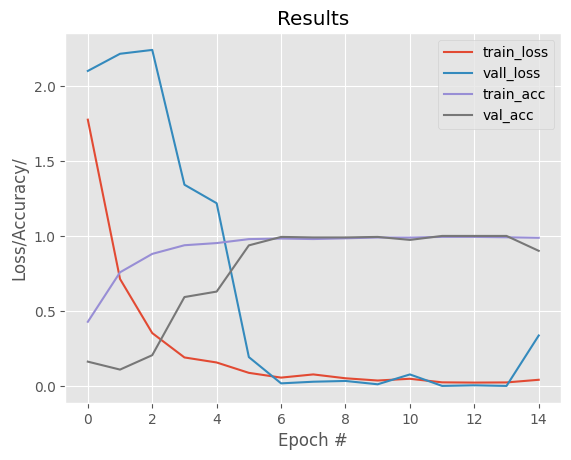

In [ ]:
# в этом блоке кода мы выводим результаты обучения
# график обучения выводится тут-же: под этим блоком кода

predictions = model.predict (testX, batch_size = 32)
print(predictions)

print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=classes)) # не забудьте поставить тут правильные имена

N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="vall_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Results")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy/")
plt.legend()
plt.show()

# # строки ниже сохраняли бы последнее состояние модели и график обучения
# plt.savefig("/content/drive/MyDrive/NSK_Lesson5/Loss.png")
# # model.save("/content/drive/MyDrive/GoogleColab/Lesson_4/EasyNet.h5")

# from google.colab.patches import cv2_imshow
# img = cv2.imread("/content/drive/MyDrive/NSK_Lesson5/Loss.png")
# cv2_imshow(img)


# print("End")

In [ ]:
model = tf.keras.models.load_model("/content/MultiClas_Conv.h5")
print("Model loaded")

Model loaded


In [ ]:
# Пример того, как можно подать на вход сети одно единственное изображение и получить ответ
from google.colab.patches import cv2_imshow
image_path = '/content/drive/MyDrive/olimp/images/JU1Q0zPq-5YzI-zjcP-uxdC-wtsn9oh5dSD8.jpg'
image = cv2.imread(image_path)
cv2_imshow(image)
image1 = cv2.resize(image, (32, 32)) / 255
image1 = np.expand_dims(image1, axis=0) # сеть принимает на вход изображение с добавленным измерением, посмотрите как меняется форма массива после этой команды
pred = model.predict(image1)
print(pred)
print(pred.shape) #форма выходного массива, он двумерный


class_index = np.argmax(pred[0])
print(classes[class_index])


1/1 [==============================] - 0s 190ms/step
[[1.1440245e-05 3.0987899e-06 7.2274062e-08 5.9755921e-06 1.6461865e-06
  5.4457751e-06 9.9996555e-01 6.7042529e-06]]
(1, 8)
road_works


In [ ]:
table[table['image'] == 'images/JU1Q0zPq-5YzI-zjcP-uxdC-wtsn9oh5dSD8.jpg']

,image,class
1543,images/JU1Q0zPq-5YzI-zjcP-uxdC-wtsn9oh5dSD8.jpg,road_works


In [ ]:
modelSecond = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation="relu"),
    Dense(8, activation="softmax")
])

INIT_LR = 0.01
opt = SGD(lr=INIT_LR)
# opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

modelSecond.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"]
              )  #categorial_crosentropy

print ("Model compiled")
modelSecond.summary()

Model compiled
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               393344    
                                                                 
 dense_4 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 394,376
Trainable params: 394,376
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# тренируем нейронную сеть
# меняйте гиперпараметры в блоке кода выше и здесь, чтобы получить точность выше
EPOCHS = 15

# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/NSK_Lesson5/ConvNN_{epoch:2d}_{val_accuracy:.3f}.h5', verbose=1, period=10)
checkpointer = ModelCheckpoint(filepath='/content/MultiClas_Conv_TWO.h5', verbose=1, save_best_only=True)
# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/NSK_Lesson5/point.h5', verbose=1)

H = modelSecond.fit(X, Y, validation_data=(testX, testY),
              epochs=EPOCHS, batch_size=32,
              shuffle=True,
              callbacks=[checkpointer])

print("Model trained")

Epoch 1/15
58/63 [==========================>...] - ETA: 0s - loss: 1.6303 - accuracy: 0.4784
Epoch 1: val_loss improved from inf to 1.26965, saving model to /content/MultiClas_Conv_TWO.h5
63/63 [==============================] - 1s 9ms/step - loss: 1.6019 - accuracy: 0.4923 - val_loss: 1.2697 - val_accuracy: 0.6987
Epoch 2/15
51/63 [=======================>......] - ETA: 0s - loss: 1.1330 - accuracy: 0.7292
Epoch 2: val_loss improved from 1.26965 to 0.90148, saving model to /content/MultiClas_Conv_TWO.h5
63/63 [==============================] - 0s 5ms/step - loss: 1.1031 - accuracy: 0.7427 - val_loss: 0.9015 - val_accuracy: 0.8775
Epoch 3/15
63/63 [==============================] - ETA: 0s - loss: 0.8318 - accuracy: 0.8385
Epoch 3: val_loss improved from 0.90148 to 0.74432, saving model to /content/MultiClas_Conv_TWO.h5
63/63 [==============================] - 0s 6ms/step - loss: 0.8318 - accuracy: 0.8385 - val_loss: 0.7443 - val_accuracy: 0.8874
Epoch 4/15
55/63 [====================

10/10 [==============================] - 0s 4ms/step
[[9.85639822e-03 1.72990619e-03 6.87386375e-03 ... 9.55171466e-01
  8.25429801e-04 2.46524171e-04]
 [2.58789528e-02 8.77232105e-02 8.81709874e-01 ... 6.89928129e-05
  3.41468035e-06 3.14124991e-05]
 [4.41790046e-03 3.03105381e-03 9.90301132e-01 ... 3.05921858e-04
  1.33708760e-03 1.22807323e-04]
 ...
 [1.10634804e-01 1.48490062e-02 4.47255699e-03 ... 4.34295181e-03
  8.48854363e-01 1.14513403e-02]
 [7.77809024e-01 5.04725762e-02 2.56995279e-02 ... 7.72142550e-03
  4.73040864e-02 3.62958238e-02]
 [1.67856691e-04 6.21288418e-05 4.86733516e-05 ... 5.25382254e-03
  3.12027623e-07 3.90748989e-09]]
                      precision    recall  f1-score   support

artificial_roughness       0.94      1.00      0.97        33
            give_way       1.00      0.97      0.98        31
movement_prohibition       0.97      0.97      0.97        40
            no_entry       1.00      0.95      0.97        37
             parking       1.00     

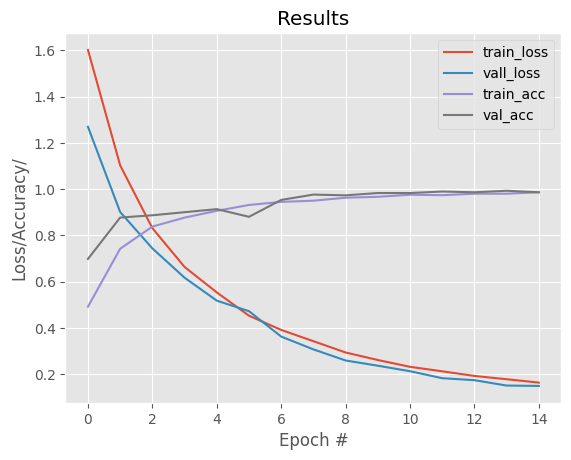

In [ ]:
predictions = modelSecond.predict(testX, batch_size = 32)
print(predictions)

print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=classes)) # не забудьте поставить тут правильные имена

N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="vall_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Results")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy/")
plt.legend()
plt.show()

In [ ]:
# Пример того, как можно подать на вход сети одно единственное изображение и получить ответ
from google.colab.patches import cv2_imshow
image_path = '/content/drive/MyDrive/olimp/images/JU1Q0zPq-5YzI-zjcP-uxdC-wtsn9oh5dSD8.jpg'
image = cv2.imread(image_path)
cv2_imshow(image)
image1 = cv2.resize(image, (32, 32)) / 255
image1 = np.expand_dims(image1, axis=0) # сеть принимает на вход изображение с добавленным измерением, посмотрите как меняется форма массива после этой команды
pred = modelSecond.predict(image1)
print(pred)
print(pred.shape) #форма выходного массива, он двумерный


class_index = np.argmax(pred[0])
print(classes[class_index])


1/1 [==============================] - 0s 33ms/step
[[7.3825113e-02 1.2422729e-02 7.3422021e-03 1.1424295e-03 8.7250076e-04
  3.3731256e-03 8.9033026e-01 1.0691627e-02]]
(1, 8)
road_works


In [ ]:
table[table['image'] == 'images/JU1Q0zPq-5YzI-zjcP-uxdC-wtsn9oh5dSD8.jpg']

,image,class
1543,images/JU1Q0zPq-5YzI-zjcP-uxdC-wtsn9oh5dSD8.jpg,road_works


In [ ]:
myModel = Sequential()

myModel.add(Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)))
myModel.add(Activation("relu"))
myModel.add(BatchNormalization(axis=-1))
myModel.add(MaxPooling2D(pool_size=(2, 2)))

myModel.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
myModel.add(BatchNormalization(axis=-1))
myModel.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
myModel.add(BatchNormalization(axis=-1))
myModel.add(MaxPooling2D(pool_size=(2, 2)))

myModel.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
myModel.add(BatchNormalization(axis=-1))
myModel.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
myModel.add(BatchNormalization(axis=-1))
myModel.add(MaxPooling2D(pool_size=(2, 2)))

myModel.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
myModel.add(BatchNormalization(axis=-1))
myModel.add(MaxPooling2D(pool_size=(2, 2)))

myModel.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
myModel.add(BatchNormalization(axis=-1))
myModel.add(MaxPooling2D(pool_size=(2, 2)))

myModel.add(Flatten())
myModel.add(Dense(128, activation="relu"))
myModel.add(BatchNormalization())
myModel.add(Dropout(0.5))

myModel.add(Dense(128, activation="relu"))
myModel.add(BatchNormalization())
myModel.add(Dropout(0.5))

myModel.add(Dense(128, activation="relu"))
myModel.add(BatchNormalization())
myModel.add(Dropout(0.5))

myModel.add(Dense(128, activation="relu"))
myModel.add(BatchNormalization())
myModel.add(Dropout(0.5))

myModel.add(Dense(8, activation="softmax"))

INIT_LR = 0.001
# opt = SGD(lr=INIT_LR)
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

myModel.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"]
              )  #categorial_crosentropy

print ("Model compiled")
myModel.summary()

Model compiled
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_17 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_92 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_93 (Bat  (None, 1

In [ ]:
# тренируем нейронную сеть
# меняйте гиперпараметры в блоке кода выше и здесь, чтобы получить точность выше
EPOCHS = 30

# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/NSK_Lesson5/ConvNN_{epoch:2d}_{val_accuracy:.3f}.h5', verbose=1, period=10)
checkpointer = ModelCheckpoint(filepath='/content/myModel.h5',
                               verbose=1,
                               save_best_only=True
)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=8)
# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/NSK_Lesson5/point.h5', verbose=1)

H = myModel.fit(X, Y, validation_data=(testX, testY),
              epochs=EPOCHS, batch_size=32,
              shuffle=True,
              callbacks=[early_stopping, checkpointer])

print("Model trained")

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 2.9698 - accuracy: 0.1590
Epoch 1: val_loss improved from inf to 2.12986, saving model to /content/myModel.h5
63/63 [==============================] - 15s 176ms/step - loss: 2.9698 - accuracy: 0.1590 - val_loss: 2.1299 - val_accuracy: 0.1325
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 2.5580 - accuracy: 0.2012
Epoch 2: val_loss did not improve from 2.12986
63/63 [==============================] - 14s 217ms/step - loss: 2.5580 - accuracy: 0.2012 - val_loss: 2.1947 - val_accuracy: 0.1325
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 2.1024 - accuracy: 0.2851
Epoch 3: val_loss did not improve from 2.12986
63/63 [==============================] - 13s 214ms/step - loss: 2.1024 - accuracy: 0.2851 - val_loss: 2.3995 - val_accuracy: 0.1325
Epoch 4/30
63/63 [==============================] - ETA: 0s - loss: 1.6814 - accuracy: 0.4083
Epoch 4: val_loss did not improve from 2.12986
63/

In [ ]:
predictions = myModel.predict(testX, batch_size = 32)

print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=classes))

10/10 [==============================] - 1s 38ms/step
                      precision    recall  f1-score   support

artificial_roughness       0.92      1.00      0.96        33
            give_way       1.00      1.00      1.00        31
movement_prohibition       1.00      1.00      1.00        40
            no_entry       1.00      0.97      0.99        37
             parking       1.00      1.00      1.00        38
 pedestrian_crossing       1.00      1.00      1.00        47
          road_works       1.00      0.93      0.97        45
                stop       0.97      1.00      0.98        31

            accuracy                           0.99       302
           macro avg       0.99      0.99      0.99       302
        weighted avg       0.99      0.99      0.99       302



Text(0.5, 1.0, 'Accuracy')

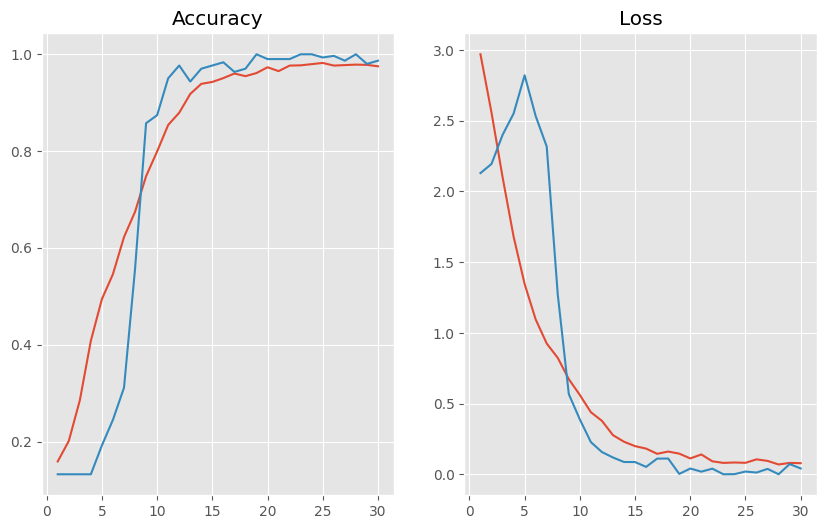

In [ ]:
plt.figure(figsize=(10, 6))
# N = np.arange(0, EPOCHS)

acc = H.history["accuracy"]
val_acc = H.history['val_accuracy']

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(val_acc) + 1), H.history["loss"], label="train_loss")
plt.plot(np.arange(1, len(val_acc) + 1), H.history["val_loss"], label="vall_loss")
plt.title("Loss")

plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(acc) + 1), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(1, len(acc) + 1), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy")

In [ ]:
# Пример того, как можно подать на вход сети одно единственное изображение и получить ответ
from google.colab.patches import cv2_imshow
image_path = '/content/drive/MyDrive/olimp/images/JU1Q0zPq-5YzI-zjcP-uxdC-wtsn9oh5dSD8.jpg'
image = cv2.imread(image_path)
cv2_imshow(image)
image1 = cv2.resize(image, (32, 32)) / 255
image1 = np.expand_dims(image1, axis=0) # сеть принимает на вход изображение с добавленным измерением, посмотрите как меняется форма массива после этой команды
pred = myModel.predict(image1)
print(pred)
print(pred.shape) #форма выходного массива, он двумерный


class_index = np.argmax(pred[0])
print(classes[class_index])


1/1 [==============================] - 0s 25ms/step
[[2.0173802e-03 5.2270252e-04 4.8772877e-06 7.3223571e-05 3.3413344e-05
  4.4804063e-05 9.9718058e-01 1.2298948e-04]]
(1, 8)
road_works


In [ ]:
table[table['image'] == 'images/JU1Q0zPq-5YzI-zjcP-uxdC-wtsn9oh5dSD8.jpg']

,image,class
1543,images/JU1Q0zPq-5YzI-zjcP-uxdC-wtsn9oh5dSD8.jpg,road_works
